In [30]:

library(data.table)

library(dplyr)

library(DT)

In [31]:
library(lubridate)


Attaching package: ‘lubridate’

The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from ‘package:base’:

    date



In [34]:
library(ggplot2)
library(corrplot)


In [47]:
install.packages("ggdendro")

Installing package into ‘/home/anand/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [48]:
install.packages("ggrepel")

Installing package into ‘/home/anand/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [49]:
library(ggdendro)

library(ggrepel)


In [36]:
df <- tail(fread("final_dataset.csv",encoding = "UTF-8"),20000)

In [37]:
df$trending_date <- ydm(df$trending_date)

In [38]:
df$publish_time <- ymd(substr(df$publish_time,start = 1,stop = 10))

In [40]:
df$dif_days <- df$trending_date-df$publish_time

In [42]:
summary(df)

       V1          Unnamed: 0      video_id         trending_date       
 Min.   :  409   Min.   :  410   Length:20000       Min.   :2017-11-14  
 1st Qu.: 5409   1st Qu.: 5410   Class :character   1st Qu.:2018-02-10  
 Median :10408   Median :10410   Mode  :character   Median :2018-03-08  
 Mean   :10408   Mean   :10410                      Mean   :2018-03-07  
 3rd Qu.:15408   3rd Qu.:15409                      3rd Qu.:2018-04-02  
 Max.   :20408   Max.   :20409                      Max.   :2018-05-03  
    title           channel_title       category_id     publish_time       
 Length:20000       Length:20000       Min.   : 1.00   Min.   :2009-02-13  
 Class :character   Class :character   1st Qu.:17.00   1st Qu.:2018-02-09  
 Mode  :character   Mode  :character   Median :23.00   Median :2018-03-06  
                                       Mean   :19.93   Mean   :2018-03-05  
                                       3rd Qu.:24.00   3rd Qu.:2018-03-31  
                                 

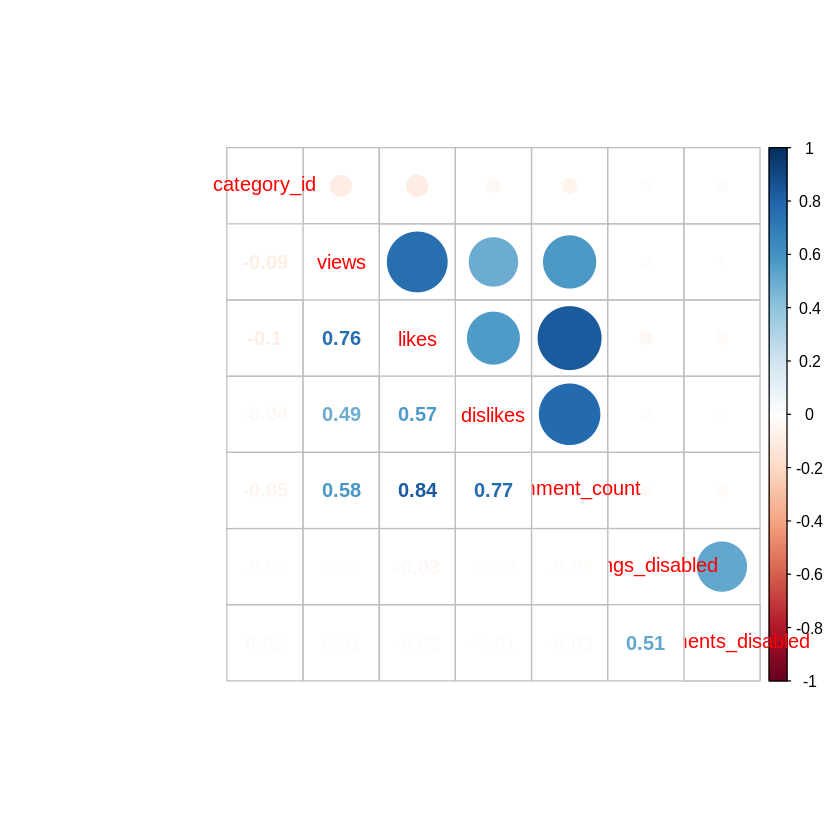

In [43]:
corrplot.mixed(corr = cor(df[,c("category_id","views","likes","dislikes","comment_count","ratings_disabled","comments_disabled"),with=F]))

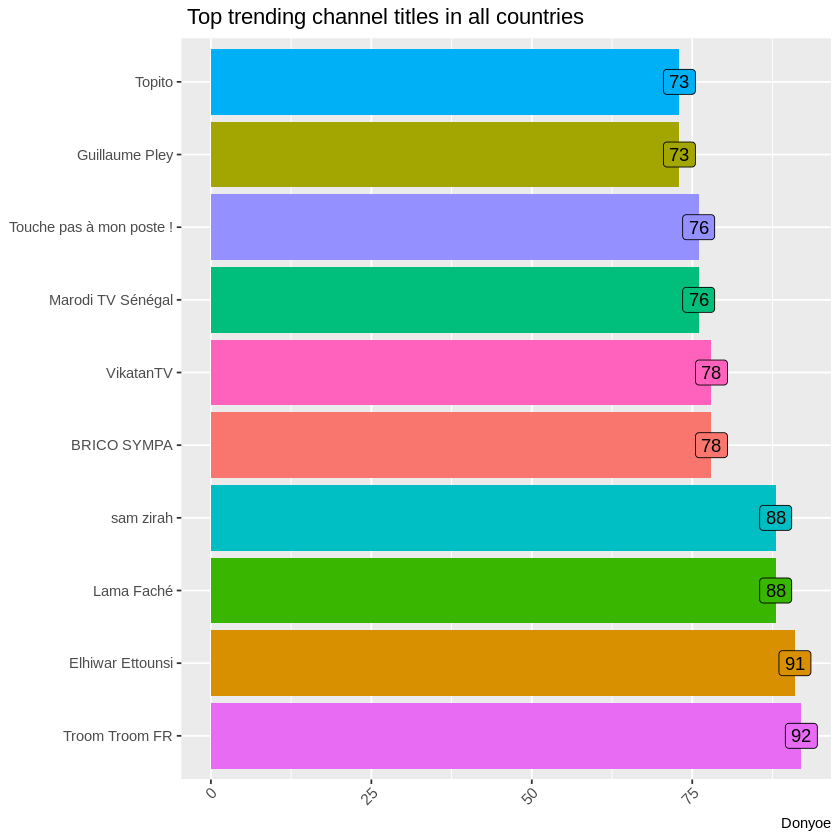

In [44]:
ggplot(df[,.N,by=channel_title][order(-N)][1:10],aes(reorder(channel_title,-N),N,fill=channel_title))+geom_bar(stat="identity")+geom_label(aes(label=N))+guides(fill="none")+theme(axis.text.x = element_text(angle = 45,hjust = 1))+  labs(caption="Donyoe",title=" Top trending channel titles in all countries")+

xlab(NULL)+ylab(NULL)+coord_flip()

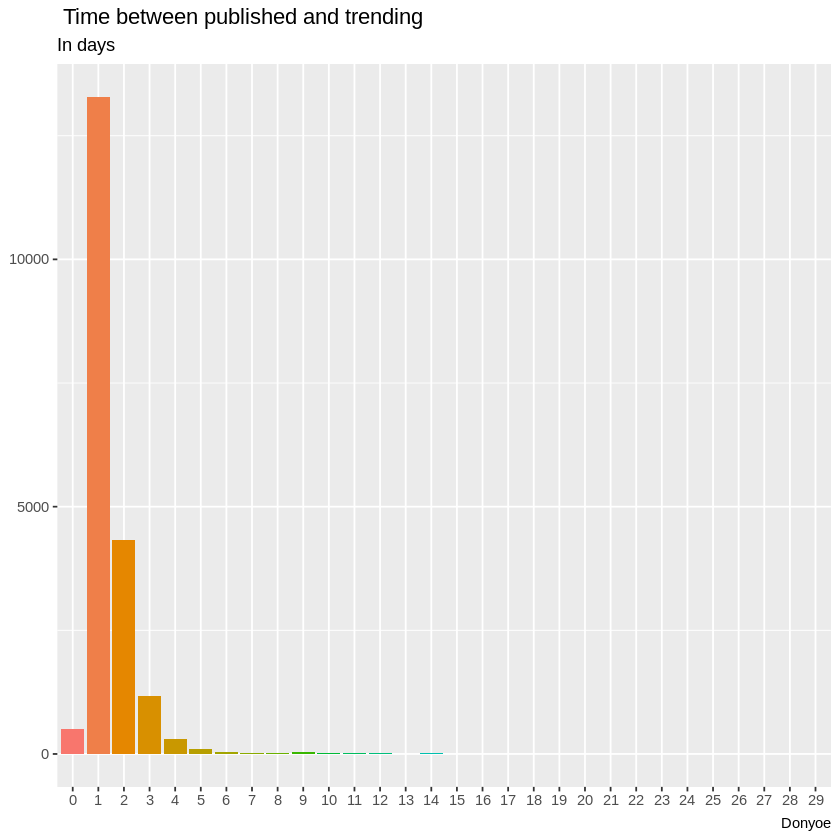

In [45]:
ggplot(df[dif_days<30],aes(as.factor(dif_days),fill=as.factor(dif_days)))+geom_bar()+guides(fill="none")+labs(caption="Donyoe",title=" Time between published and trending",subtitle="In days")+xlab(NULL)+ylab(NULL)

Warning message:
“Ignoring unknown parameters: check_overlap”`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


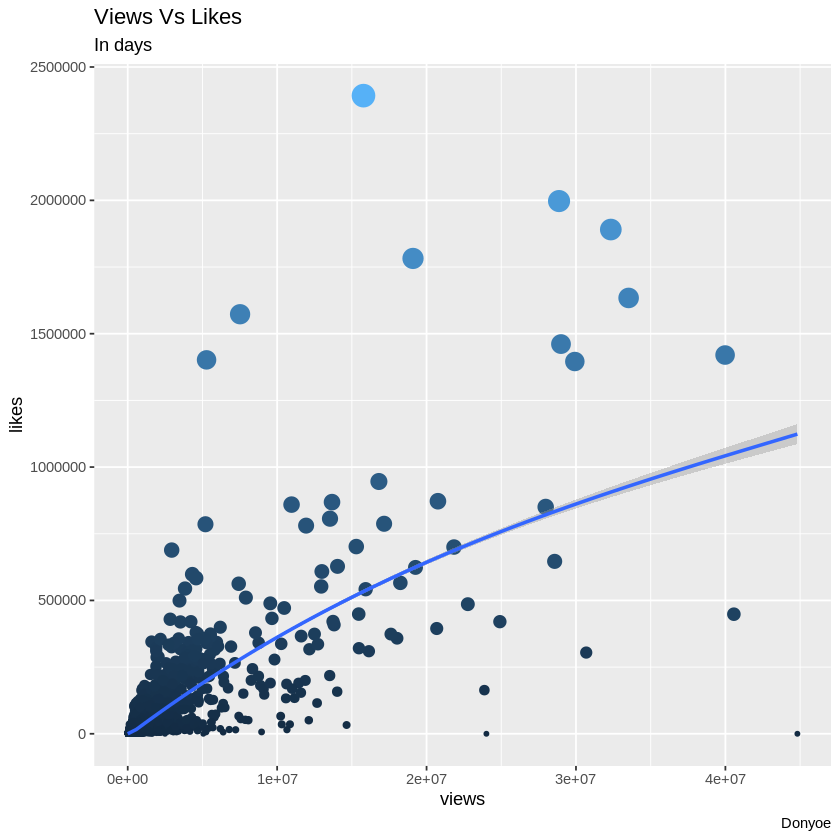

In [51]:
ggplot(df[,.("views"=max(views),"likes"=max(likes)),by=title],aes(views,likes,colour=likes,size=likes))+geom_jitter()+geom_smooth()+guides(fill="none")+labs(caption="Donyoe",title="Views Vs Likes",subtitle="In days")+theme(legend.position = "none")+geom_text_repel(data=subset(df[,.("views"=max(views),"likes"=max(likes)),by=title], views > 5e+07),

            aes(views,likes,label=title),check_overlap=T)

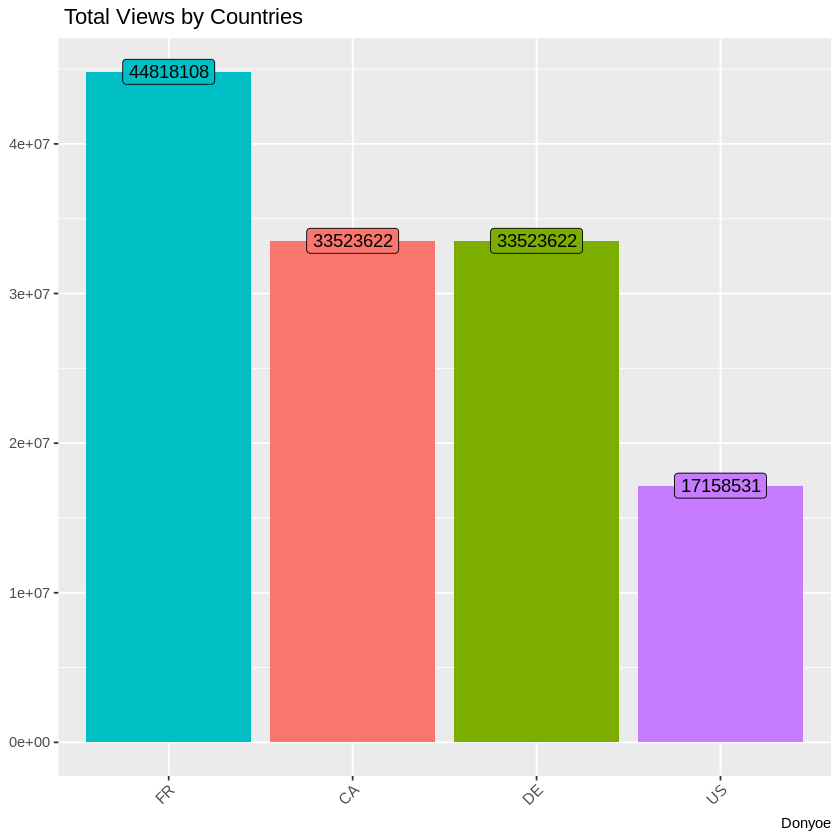

In [58]:
ggplot(df[,.("Total_Views"=max(views)),by=Location],aes(reorder(Location,-Total_Views),Total_Views,fill=Location))+geom_bar(stat="identity")+geom_label(aes(label=Total_Views))+guides(fill="none")+theme(axis.text.x = element_text(angle = 45,hjust = 1))+  labs(caption="Donyoe",title=" Total Views by Countries")+xlab(NULL)+ylab(NULL)

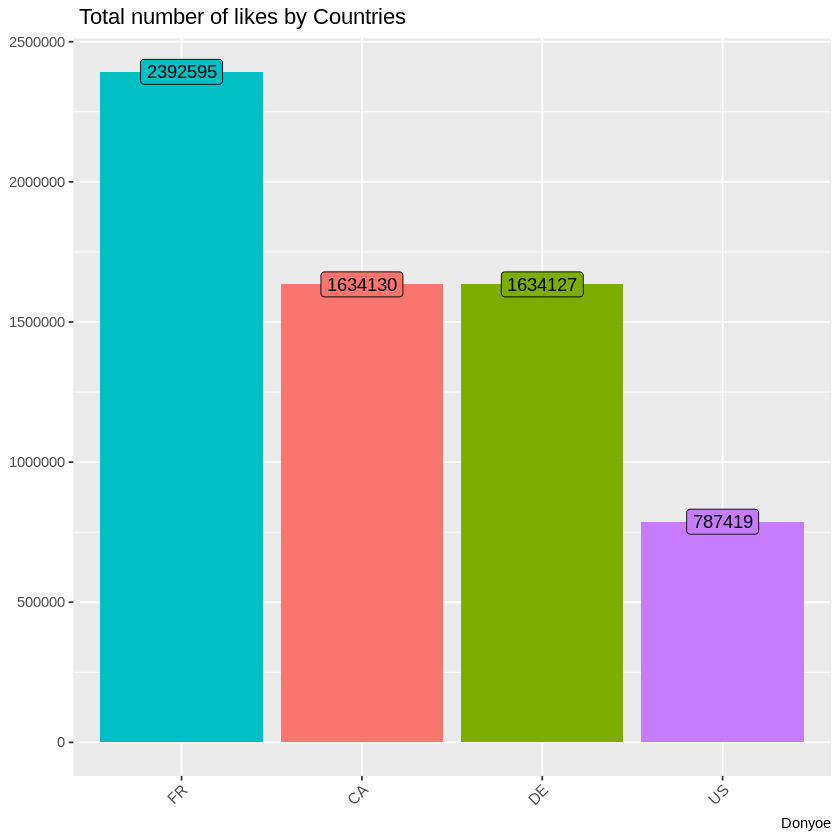

In [59]:
ggplot(df[,.("Total_Likes"=max(likes)),by=Location],aes(reorder(Location,-Total_Likes),Total_Likes,fill=Location))+geom_bar(stat="identity")+geom_label(aes(label=Total_Likes))+guides(fill="none")+theme(axis.text.x = element_text(angle = 45,hjust = 1))+  labs(caption="Donyoe",title=" Total number of likes by Countries")+xlab(NULL)+ylab(NULL)

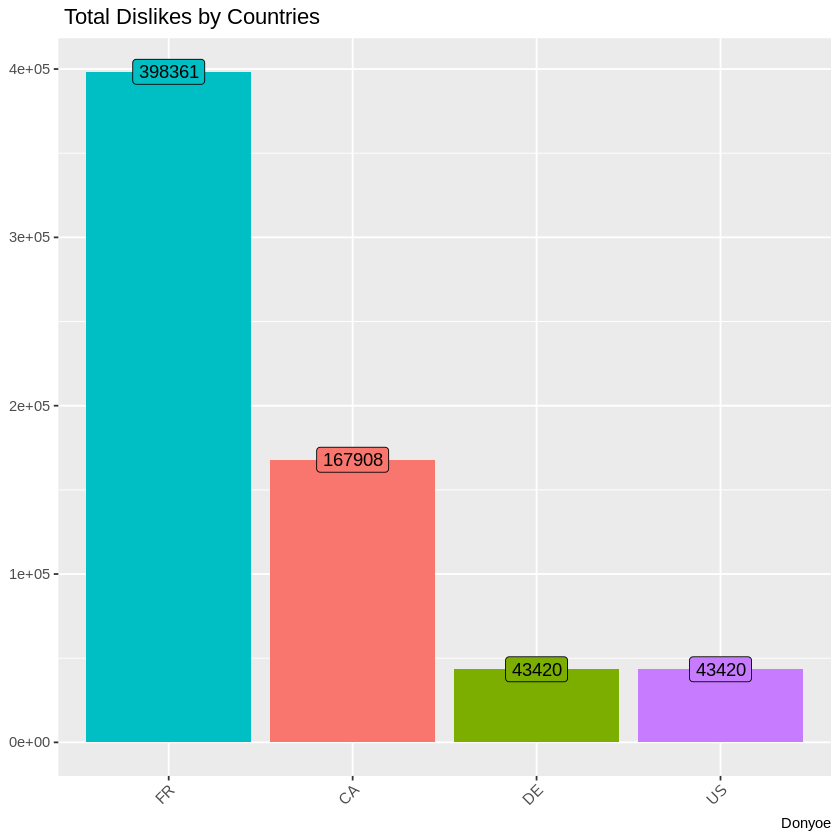

In [60]:
ggplot(df[,.("Total_Dislikes"=max(dislikes)),by=Location],aes(reorder(Location,-Total_Dislikes),Total_Dislikes,fill=Location))+geom_bar(stat="identity")+geom_label(aes(label=Total_Dislikes))+guides(fill="none")+theme(axis.text.x = element_text(angle = 45,hjust = 1))+  labs(caption="Donyoe",title=" Total Dislikes by Countries")+xlab(NULL)+ylab(NULL)

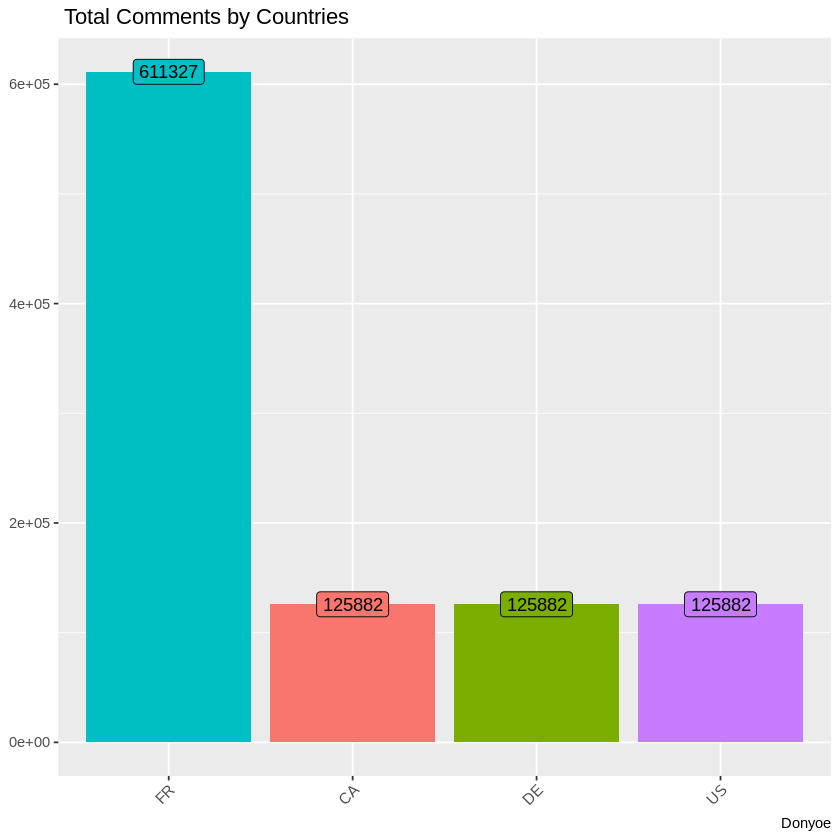

In [61]:
ggplot(df[,.("Total_Comments"=max(comment_count)),by=Location],aes(reorder(Location,-Total_Comments),Total_Comments,fill=Location))+geom_bar(stat="identity")+geom_label(aes(label=Total_Comments))+guides(fill="none")+theme(axis.text.x = element_text(angle = 45,hjust = 1))+  labs(caption="Donyoe",title=" Total Comments by Countries")+xlab(NULL)+ylab(NULL)

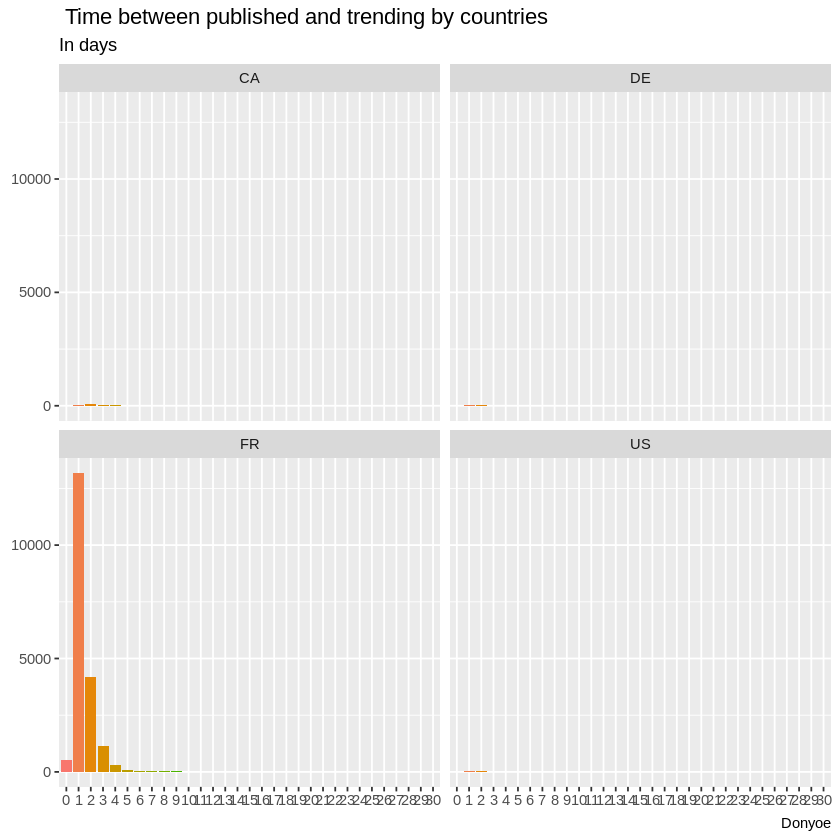

In [63]:
ggplot(df[dif_days<40],aes(as.factor(dif_days),fill=as.factor(dif_days)))+geom_bar()+guides(fill="none")+labs(caption="Donyoe",title=" Time between published and trending by countries",subtitle="In days")+xlab(NULL)+ylab(NULL)+facet_wrap(~Location)

In [53]:
mvideo <- df[,.("Percentage_Likes"=round(100*max(likes,na.rm = T)/max(views,na.rm = T),digits = 2)),by=.(title,thumbnail_link)][order(-Percentage_Likes)]



mvideo %>% 

  mutate(image = paste0('<img width="80%" height="80%" src="', thumbnail_link , '"></img>')) %>% 

  arrange(-Percentage_Likes) %>% 

  top_n(10,wt = Percentage_Likes) %>% 

  select(image, title, Percentage_Likes) %>% 

  datatable(class = "nowrap hover row-border", escape = FALSE, options = list(dom = 't',scrollX = TRUE, autoWidth = TRUE))

HTML widgets cannot be represented in plain text (need html)

In [54]:
mvideo

title,thumbnail_link,Percentage_Likes
<chr>,<chr>,<dbl>
Nigthcore ( Spécial 3M ) - Burn,https://i.ytimg.com/vi/Ay7RapOcTow/default.jpg,40.60
NUMBERS - Épisode 1,https://i.ytimg.com/vi/wpysUoQYuGM/default.jpg,31.61
J'ENLÈVE MON MASQUE CONTRE DE L'ARGENT ?!,https://i.ytimg.com/vi/xboB_Q_8F_o/default.jpg,30.86
LA HOTLINE D'EN MARCHE - Le Bon Sens,https://i.ytimg.com/vi/V5dZ4wADgxg/default.jpg,30.57
[VOSTFR] JIMIN SE SENT MAL CAR UN OISEAU A PERDU SA PATTE ;-;,https://i.ytimg.com/vi/eyJHvlBx7fk/default.jpg,29.75
#FANTAXYOU2 GUNTER L'ALLEMAND !,https://i.ytimg.com/vi/sf5xMpTW1LE/default.jpg,29.63
"JE SUIS DE RETOUR, JE TE JURE.",https://i.ytimg.com/vi/mTj0oBsb4ds/default.jpg,28.30
Je suis trans,https://i.ytimg.com/vi/INUdBCxkVLY/default.jpg,28.27
LA DATE OFFICIELLE DE LA SORTIE DE LA HIXTAPE ! (#HixtapeisComing),https://i.ytimg.com/vi/3FKsEmXmP84/default.jpg,27.79
